In [2]:
import as_seg.scripts.default_path as paths
import as_seg.scripts.overall_scripts as scr
import as_seg.CBM_algorithm as CBM
import as_seg.data_manipulation as dm
from as_seg.model.current_plot import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mirdata
import os

In [3]:
import musicae.scripts.default_path as paths

annotations_folder = "{}/MIREX10".format(paths.path_annotation_rwc)
paths_dataset = scr.load_RWC_dataset(paths.path_entire_rwc, "MIREX10")
number_bars = 0
for song_and_annotations in paths_dataset:
    song_number = song_and_annotations[0]
    bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, "{}/{}.wav".format(paths.path_entire_rwc, song_number))
    number_bars += len(bars)
        
print(number_bars/100)


115.34


In [6]:
def this_plot_lenghts_hist(lengths):
    fig, axs = plt.subplots(1, 1, figsize=(6, 2))
    axs.hist(lengths, bins = range(1,34), density = True, cumulative = False, align = "left")
    plt.xticks(np.concatenate([[1],range(4, 34, 4)]))
    plt.ylim(0,0.4)

    axs.set_xlabel("Size of the segment, in number of bars")
    axs.set_ylabel("Proportion\namong all segments")
    fig.savefig(f"Repartition_todefine.pdf", bbox_inches = "tight")#, format='png')

    plt.show()

70 not found, normal ?


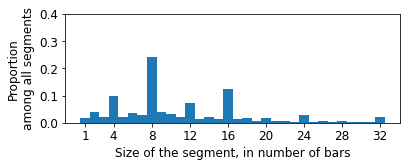

In [7]:
plt.rcParams.update({'font.size': 12})

salami = mirdata.initialize('salami', data_home = paths.path_entire_salami)
len_salami = len(salami.track_ids)

lengths = []

all_tracks = salami.load_tracks()

song_idx = 0

file_test_set_gs = open(f"{os.getcwd()}/test_set_salami_gs.txt")

test_dataset = []
for part in file_test_set_gs.readlines():
    line_broken = part.split("\n")
    test_dataset.append(int(line_broken[0]))

for key, track in all_tracks.items():
    if int(key) in test_dataset:
        try:
            bars = scr.load_or_save_bars(paths.path_data_persisted_salami, track.audio_path)
            ref_tab = []
            try:
                references_segments = salami.load_sections(track.sections_annotator1_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass

            try:
                references_segments = salami.load_sections(track.sections_annotator2_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass
            for annotations in ref_tab:
                barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
                for i in range(len(barwise_annot) - 1):
                    lengths.append(barwise_annot[i+1] - barwise_annot[i])
                        

        except FileNotFoundError:
            print(f"{key} not found, normal ?")

this_plot_lenghts_hist(lengths)


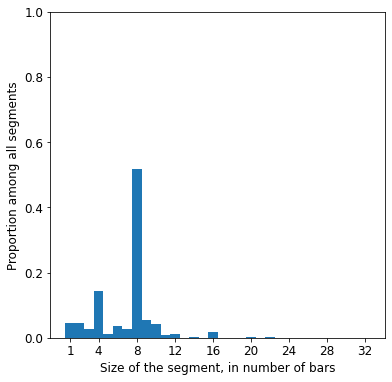

In [9]:
plt.rcParams.update({'font.size': 12})

annotations_folder = "{}/MIREX10".format(paths.path_annotation_rwc)
paths_dataset = scr.load_RWC_dataset(paths.path_entire_rwc, "MIREX10")
lengths = []

song_idx = 0

for song_and_annotations in paths_dataset:
    song_number = song_and_annotations[0]
    annot_path = "{}/{}".format(annotations_folder, song_and_annotations[1])
    annotations = dm.get_segmentation_from_txt(annot_path, "MIREX10")
    bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, "{}/{}.wav".format(paths.path_entire_rwc, song_number))
    barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
    for i in range(len(barwise_annot) - 1):
        lengths.append(barwise_annot[i+1] - barwise_annot[i])
        
plot_lenghts_hist(lengths)


In [ ]:
arr = plt.hist(lengths, bins = range(0,40), density = True, cumulative = False, align = "left")[0]
0.1 * (1/(arr/np.amax(arr)) - 1)